<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Random Forests - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [501]:
import matplotlib.pyplot as plt

%matplotlib inline

In [502]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [503]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [504]:
X.head()
# Taking a quick glance at the data overall

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [505]:
X.isnull().sum()
# No nulls in the data set. Great! 
# If there were nulls, I would fill them with the mean for numeric values, and mode for categorical.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [506]:
X.index
# Checking the index to see if the data starts or stops at odd places

RangeIndex(start=0, stop=506, step=1)

In [507]:
X.dtypes
# Everything has the same data type. Simple.

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [508]:
X.shape
# 506 rows, 13 columns

(506, 13)

In [509]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [510]:
X.nunique().sort_values(ascending=False)
# Looking for unique values sorting highest to largest.

CRIM       504
LSTAT      455
RM         446
DIS        412
B          357
AGE        356
NOX         81
INDUS       76
TAX         66
PTRATIO     46
ZN          26
RAD          9
CHAS         2
dtype: int64

In [511]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


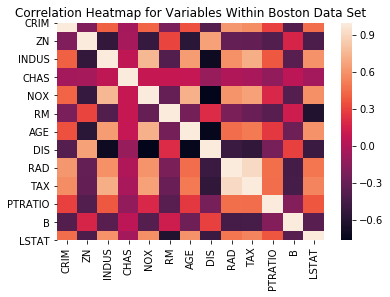

In [512]:
import seaborn as sns

corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Correlation Heatmap for Variables Within Boston Data Set');

# A correlation heatmap for all of the variables
# I'm curious to see if there's any potential for multicollinearity here
# This data doesn't show the correlation with the predictive variable; I could run this again to guide my selection of variables for analysis

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [513]:
# I'm going to use CRIM, RM, DIS, and PTRATIO

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
var = ['CRIM', 'RM', 'DIS', 'PTRATIO']
Xcopy = X[var].copy()
lreg.fit(Xcopy, y)
Xcopy['Predict'] = lreg.predict(Xcopy)
Xcopy.head()

,CRIM,RM,DIS,PTRATIO,Predict
0,0.00632,6.575,4.0900,15.3,28.784135
1,0.02731,6.421,4.9671,17.8,24.987249
2,0.02729,7.185,4.9671,17.8,30.622519
3,0.03237,6.998,6.0622,18.7,28.297623
4,0.06905,7.147,6.0622,18.7,29.389175


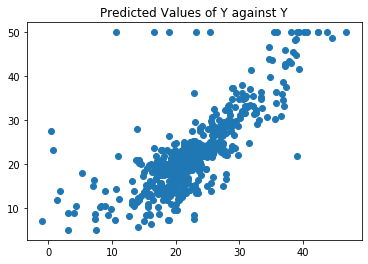

In [514]:
plt.scatter(Xcopy['Predict'], y);
plt.title('Predicted Values of Y against Y');
# We can see that there's a relationship between the predicted values and y
# However, there are also several outliers

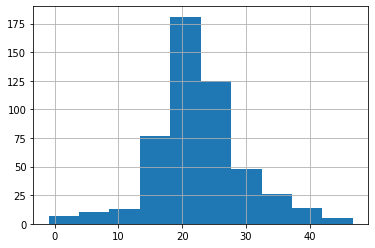

In [515]:
Xcopy['Predict'].hist();
# Looking at the dispersion of predicted values around the mean

In [516]:
Xcopy.drop('Predict', inplace=True, axis=1)
lreg.score(Xcopy, y)
# This is not a very good R2
# This and the scatter plot make me think there are other variables which might be better to include in this model

0.5943513973592274

In [517]:
Xcopy -=Xcopy.mean()
Xcopy /= X.std()

In [518]:
lreg.fit(Xcopy,y).score(Xcopy,y)
# Scaling the data and re-scoring it

0.5943513973592274

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [519]:
from sklearn.model_selection import train_test_split

#70/30 split
Xcopy_train, Xcopy_test, y_train, y_test = train_test_split(Xcopy, y, test_size = .3, random_state = 2020)
# I'm performing the train/test splits on the same variables I used in previous steps
# The data is still scaled

In [520]:
Xcopy_train.shape
# Just checking to see if this split correctly. I would expect to see 354 rows.

(354, 4)

In [521]:
lreg.fit(Xcopy_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [522]:
lreg.score(Xcopy_test, y_test)
# With a 70/30 split the R2 dropped by several points.

0.5116842660018406

In [523]:
Predict70 = lreg.predict(Xcopy_test)

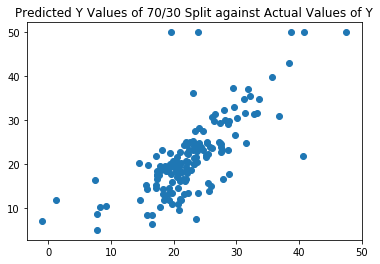

In [524]:
plt.scatter(Predict70, y_test);
plt.title('Predicted Y Values of 70/30 Split against Actual Values of Y');

In [525]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.regplot(x=Predict70, y=y_test, data = Xcopy_test);
# Trying to draw a plot with a linear regression line. 
# For some reason this is showing an error even though it's producing the correct plot.

In [526]:
#90/10 split
Xcopy_train, Xcopy_test, y_train, y_test = train_test_split(Xcopy, y, test_size = .1, random_state = 2020)
Xcopy_train.shape
# Just double checking the shape again to make sure I wrote the above code correctly

(455, 4)

In [527]:
lreg.score(Xcopy_test, y_test)
# The R2 improves with a 90/10 split, even above the normal linear regression

0.6061318229326118

In [528]:
Predict90 = lreg.predict(Xcopy_test)

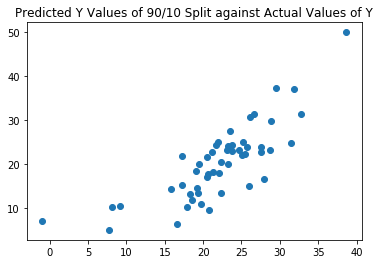

In [529]:
plt.scatter(Predict90, y_test);
plt.title('Predicted Y Values of 90/10 Split against Actual Values of Y');

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [578]:
from sklearn.model_selection import cross_val_score

In [579]:
#10 Folds; running as a test for a single item before I create the function
scores = cross_val_score(estimator = lreg, X= Xcopy_train, y=y_train, cv=10)
max(scores)

0.7942987807671084

In [580]:
# Calculating the MAX
cv_scores = []
num_folds = [5, 6, 7, 10]

for fold in num_folds:
    scores = cross_val_score(estimator=lreg, X=Xcopy_train, y=y_train, cv=fold)
    cv_scores.append(scores)

cv_dict = {}

for idx, fold in enumerate(num_folds):
    cv_dict[f'folds: {fold}'] = np.max(cv_scores[idx])
cv_dict
# Specifically chose the max to compare against what I ran above

{'folds: 5': 0.7757383708263569,
 'folds: 6': 0.8098993972743093,
 'folds: 7': 0.7977886301983288,
 'folds: 10': 0.7942987807671084}

In [581]:
# Calculating the MEAN
cv_dict = {}
for idx, fold in enumerate(num_folds):
    cv_dict[f'{fold}'] = np.mean(cv_scores[idx])
cv_dict

# Re-did this to calculate the mean score for each fold
# Using the kfold technique, the optimal number of folds for these variables is 6.
# However it's worth noting that the cv scores here are relatively low.

{'5': 0.5593765402176014,
 '6': 0.5715527587244031,
 '7': 0.5577518591777116,
 '10': 0.563875584542897}

In [582]:
scores = cross_val_score(estimator = lreg, X= Xcopy_train, y=y_train, cv=10)
scores

array([0.49812571, 0.55129499, 0.39103579, 0.52857408, 0.47197967,
       0.25444347, 0.75346602, 0.63099651, 0.76454084, 0.79429878])

In [601]:
cv_scores = []
num_folds = [5, 6, 7, 10]
for fold in num_folds:
    scores = cross_val_score(estimator=lreg, X=Xcopy_train, y=y_train, cv=fold)
    scores_list = scores.tolist()
    scores_df = pd.DataFrame({'Score':scores_list})
    scores_df['Fold'] = fold
    cv_scores.append(scores_df)
cv_scores_df= pd.concat(cv_scores)
cv_scores_df

,Score,Fold
0,0.513247,5
1,0.489090,5
2,0.308924,5
3,0.709884,5
4,0.775738,5
0,0.500910,6
1,0.556148,6
2,0.419930,6
3,0.503853,6
4,0.638576,6


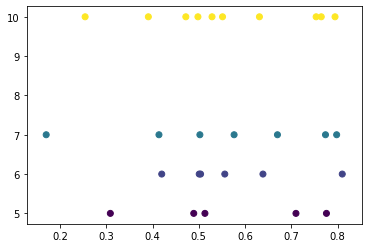

In [612]:
plt.scatter(cv_scores_df['Score'],cv_scores_df['Fold'], c=cv_scores_df['Fold']);

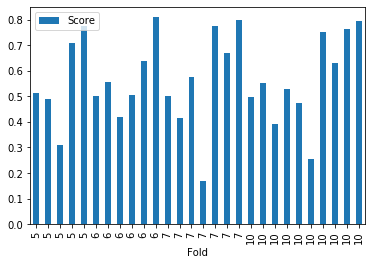

In [616]:
cv_scores_df.plot.bar(x='Fold', y='Score')

In [535]:
# For the heck of it I'm going to run lasso and ridge regressions as well
from sklearn.linear_model import Ridge, Lasso
ridge, lasso = Ridge(), Lasso()

In [536]:
# Using this to determine the best value of alpha
alphas = np.logspace(-4, 4, 9)
ridge_scores = []
lasso_scores = []

for value in alphas:
    ridge.set_params(alpha = value)
    lasso.set_params(alpha = value)
    lasso_score = cross_val_score(estimator=lasso, X=Xcopy, y=y, cv=10)
    ridge_score = cross_val_score(estimator=ridge, X=Xcopy, y=y, cv=10)
    ridge_scores.append((np.mean(ridge_score), value))
    lasso_scores.append((np.mean(lasso_score), value))

In [537]:
max(ridge_scores)
# The best value of alpha is 10
# Double check the set up here; these numbers are very low

(-0.005505922778032246, 10.0)

In [538]:
max(lasso_scores)

(0.012513525252942049, 0.1)

In [550]:
ridge.alpha = 10
ridge.fit(Xcopy_train, y_train)
ridge.coef_

array([[-1.77350441,  5.08627772,  0.04542312, -2.20890059]])

## Using Random Forests With the Boston Dataset

#### Create X and y variables for Your Data

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

rf = RandomForestRegressor(min_samples_leaf = 3, n_estimators = 70, random_state = 2020)

#### Divide it into a training and test set

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = .2)

#### Fit a Random Forest on the data

In [ ]:
rf.fit(train_x, train_y)

In [ ]:
y_pred = rf.predict(train_x)

In [ ]:
plt.scatter(y_pred, train_y);
plt.title('Predicted RF Values of Y against Actual Values of Y');
# A very close relationship here

#### What are its most important features?

In [ ]:
rf.feature_importances_

weights = pd.DataFrame(rf.feature_importances_, index=X.columns)
weights.sort_values(by=0, ascending=False)
# The variables with the highest weights are LSTAT and RM

#### How well does your model perform on your test set?

In [ ]:
rf.score(test_x, test_y)
# This model performs pretty well relative to other models I've run

#### Challenge:  Try and find at least two improvements to your model to improve test scores.

You can try the following:
 - increasing the number of trees
 - using a different number of maximum features to sample
 - using a different number of minimum samples per leaf

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = .2)
rf.fit(train_x, train_y)
rf.score(test_x, test_y)
# My score improves when I remove min_leaf_samples parameters and increase the number of trees to 100

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [ ]:
# Use different features
# Change the test split and kfolds

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# I'm looking for the relationship between other variables here
import seaborn as sns
sns.pairplot(X);
# It looks like there are interesting relationships between DIS and NOX, DIS and RM, LSTAT and RM, LSTAT and AGE

In [ ]:
X.corr()

In [ ]:
# Calculating Pearson scores here
from scipy.stats import pearsonr
# Calculate pearson correlation
a = df['CRIM']
b = df['MEDV']
pearsonr(a, b)
# This function is going to run through all variables and output Pearson scores for them

results = []

for x in df.drop('MEDV', axis=1).columns:
    result = pearsonr(df[x], b)
    results.append(result)

PearsonResults = pd.DataFrame(results, index=df.drop('MEDV', axis=1).columns, columns=['Pearson', 'p-value'])
PearsonResults

In [ ]:
PearsonResults = PearsonResults['Pearson'].abs().sort_values(ascending=False)
PearsonResults
# The highest are LSTAT and RM
# This is in line with other analysis I did earlier in the homework